In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Números aleatorios

In [2]:
np.random.random()  #Distribución uniforme

0.761722464717196

In [4]:
# Semilla / Seed
# Se usa para que te de el mismo valor aleatorio
np.random.seed(1234)
np.random.random()

0.1915194503788923

Los valores de `np.random` son pseudoaleatorios, no aleatorios, porque están generados por un algoritmo.

In [7]:
np.random.seed(1234) #La semilla debe estar siempre antes del np.random
np.random.random(5)

array([0.19151945, 0.62210877, 0.43772774, 0.78535858, 0.77997581])

In [11]:
#Guardamos de la misma semilla un cierto número de números aleatorios
np.random.seed(1234)
aleatorios = np.random.random(1000)

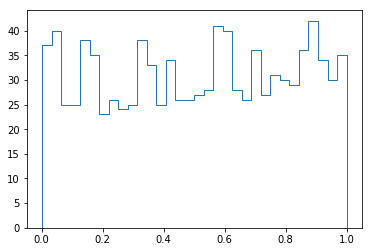

In [12]:
#Se genera un histograma
plt.hist(aleatorios, bins = "sqrt", histtype = "step")
plt.show()

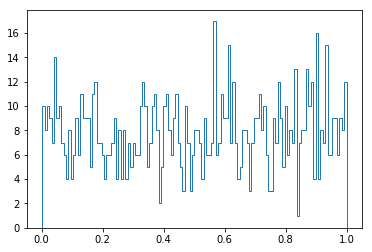

In [13]:
plt.hist(aleatorios, bins = 128, histtype = "step")
plt.show()

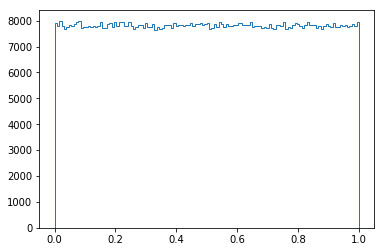

In [25]:
#Prueba con un millón de números aleatorios
np.random.seed(1234)
aleatorios = np.random.random(1000000)
plt.hist(aleatorios, bins = 128, histtype = "step")
plt.show()

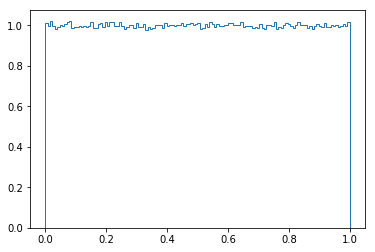

In [28]:
#Distribución de probabilidades (de 0 a 1)
np.random.seed(1234)
aleatorios = np.random.random(1000000)
plt.hist(aleatorios, bins = 128, histtype = "step", density = True)
plt.show()

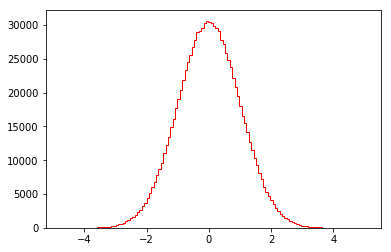

In [29]:
#Para sacar una distribución normal
np.random.seed(1234)
aleatorios = np.random.randn(1000000)
plt.hist(aleatorios, bins = 128, histtype = "step", color = "red")
plt.show()

### Casino

Dados

In [30]:
def rollDice():
    return np.random.randint(1,7) #El último no lo lee

In [35]:
#List compression
[rollDice() for i in range(10)]

[6, 1, 2, 2, 4, 4, 4, 3, 2, 3]

In [42]:
def rollGame():
    roll = np.random.randint(1,7)
    if roll >= 4:
        print("El resultado fue %s, pierdes! Juega otra vez" %roll)
    else:
        print("El resultado está entre 1 y 3. Ganaste!")

In [43]:
rollGame()

El resultado fue 4, pierdes! Juega otra vez


In [69]:
def rollGame():
    roll = np.random.randint(1,7)
    if roll >= 4:
        return False
    else:
        return True

In [61]:
def apostador_simple(fondos, ini_apuesta, n_apuestas):
    valor = fondos
    apuesta = ini_apuesta
    apuestaActual = 0
    wX, wY = [], []
    while apuestaActual < n_apuestas:
        if rollGame():
            valor += apuesta
        else:
            valor -= apuesta
        apuestaActual += 1
        print("Fondos: ", valor)

In [62]:
apostador_simple(10000, 100, 5)

Fondos:  10100
Fondos:  10000
Fondos:  9900
Fondos:  9800
Fondos:  9700


In [78]:
def apostador_simple(fondos, ini_apuesta, n_apuestas):
    valor = fondos
    apuesta = ini_apuesta
    apuestaActual = 0
    wX, wY = [], []
    while apuestaActual < n_apuestas:
        if rollGame():
            valor += apuesta
            wX.append(apuestaActual)
            wY.append(valor)
        else:
            valor -= apuesta
            wX.append(apuestaActual)
            wY.append(valor)
        apuestaActual += 1
    plt.plot(wX, wY, lw = .5)

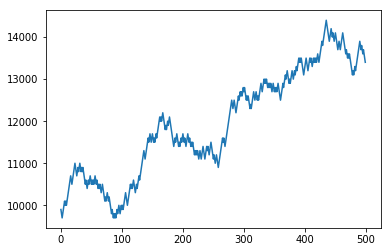

In [73]:
apostador_simple(10000, 100, 500)

In [87]:
plt.style.use("ggplot")

In [92]:
plt.style.use("dark_background")

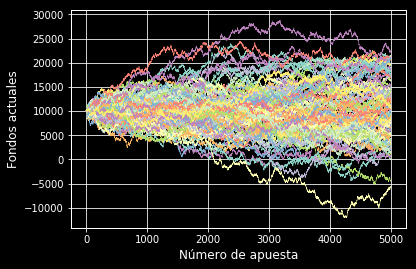

In [82]:
x = 0
while x < 100:
    apostador_simple(10000, 100, 5000)
    x += 1
    plt.grid(True, color = "white")
    plt.ylabel("Fondos actuales")
    plt.xlabel("Número de apuesta")
plt.show()

### Caminata aleatoria

In [83]:
numeros = np.array([1,2,3,4,5,6])

In [84]:
np.cumsum(numeros)

array([ 1,  3,  6, 10, 15, 21], dtype=int32)

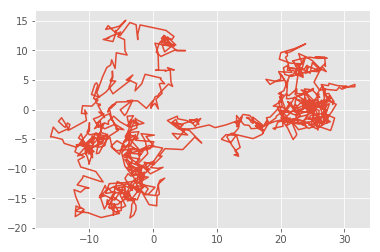

In [89]:
npasos = 1000
x = np.cumsum(np.random.randn(npasos))
y = np.cumsum(np.random.randn(npasos))

plt.plot(x, y);

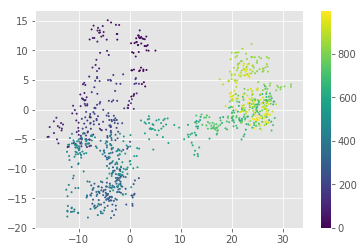

In [91]:
plt.scatter(x,y, c = range(npasos), lw = 0, marker = "o", s = 4, cmap = "viridis")
plt.colorbar()
plt.show()

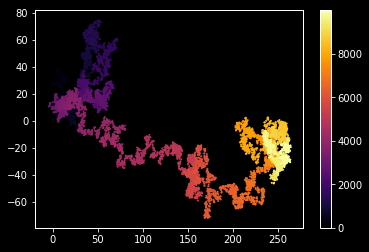

In [99]:
npasos = 10000
x = np.cumsum(np.random.randn(npasos))
y = np.cumsum(np.random.randn(npasos))
plt.scatter(x,y, c = range(npasos), lw = 0, marker = "o", s = 4, cmap = "inferno")
plt.grid(False)
plt.colorbar()
plt.show()

### Cadenas de Markov

In [102]:
n = 100 #Tamaño de la población máxima
a = 0.5 / n # Razón de nacimientos
b = 0.2 / n # Razón de muertes
npasos = 1000
x = np.zeros(npasos)
x[0] = 25 # Población inicial
for t in range(npasos - 1):
    if 0 < x[t] < n-1:
        nacimiento = np.random.rand() <= a*x[t]
        muerte = np.random.rand() <= b*x[t]
        x[t + 1] = x[t] + nacimiento * 1 - muerte * 1
    else:
        x[t + 1] = x[t]

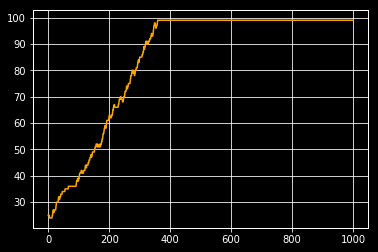

In [103]:
plt.plot(x, c = 'orange');

In [ ]:
n = 7000000000 #Tamaño de la población máxima
a = 0.5 / n # Razón de nacimientos
b = 0.2 / n # Razón de muertes
npasos = 1000
x = np.zeros(npasos)
x[0] = 25 # Población inicial
for t in range(npasos - 1):
    if 0 < x[t] < n-1:
        nacimiento = np.random.rand() <= a*x[t]
        muerte = np.random.rand() <= b*x[t]
        x[t + 1] = x[t] + nacimiento * 1 - muerte * 1
    else:
        x[t + 1] = x[t]